Done by [Sasa Buklijas](http://buklijas.info/blog/)

In [1]:
import time
import random
import matplotlib.pyplot as plt
from IPython import display
import ipywidgets as widgets

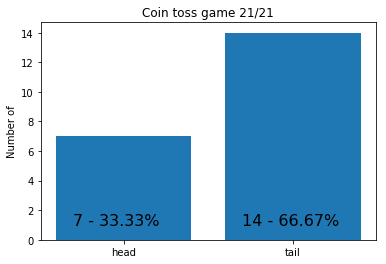

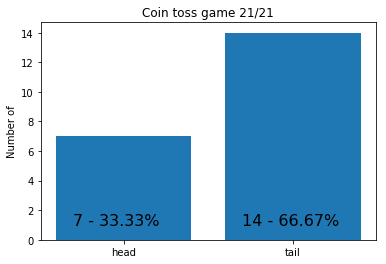

In [2]:
# method
def start_game(event):
    button.description = 'STOP Simulation'
    button.button_style='danger' 
    button.disabled=True
    slider.disabled=True
    progress.max = slider.value
    
    head = 0
    tail = 0

    NUMBER_OF_SIMULATION = slider.value
    
    for i in range(NUMBER_OF_SIMULATION):
    
        rn = random.randint(0, 1)

        if rn == 1:
            head += 1
        else:
            tail += 1

        plt.clf() # clear old data on plot
        plt.bar((0,1), (head, tail))
        plt.xticks((0, 1), ('head', 'tail'))
        plt.ylabel('Number of')
        plt.title('Coin toss game {}/{}'.format(i+1, NUMBER_OF_SIMULATION))
        plt.text(-0.3, 1, '{} - {:.2f}%'.format(head, head/(head+tail)*100), {'size': 16})
        plt.text(+0.7, 1, '{} - {:.2f}%'.format(tail, tail/(head+tail)*100), {'size': 16})
        display.clear_output(wait=True)  # to have only one picture
        display.display(plt.gcf())       # as plt.show()

        label2.value = '%s / %s' % (i+1, NUMBER_OF_SIMULATION)
        progress.value += 1
        
        time.sleep(0.1)
    else:
        display.clear_output(wait=True) # cleat it
    
    button.description = 'Start Simulation'
    button.button_style='info'
    slider.disabled=False
    button.disabled=False
    progress.value = 0
    label2.value = ''
    
    display.display(ui, plt.gcf()) # then show UI and last chart
    # there is some BUG and I get last chart 2x times
    
    
# UI
slider = widgets.IntSlider(min=10, max=100, value=5)
label = widgets.Label(value='Select number of games')

button = widgets.Button(description='Start Simulation', button_style='info', tooltip='Start Game')
progress = widgets.IntProgress(description='Progress:')
label2 = widgets.Label()

# Interactions
button.on_click(start_game)

# UI Layout
top_box = widgets.HBox([label, slider])
down_box = widgets.HBox([button, progress, label2])
ui = widgets.VBox([top_box, down_box]) 
display.display(ui)